In [1]:
import tgt

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from tgt import read_textgrid

In [4]:
#メタ情報を読み込む、日本語は文字化けするので、encodingを指定する
meta = pd.read_csv("./metaInfo/結合用/session.csv",encoding='cp932')
meta

,セッションID,会話概要,形式,場所,活動,話者間の関係性,収録年
0,C001_001,飲食店で友人たちと誕生日会,雑談,公共商業施設_飲食店,付き合い,友人知人,2016年
1,C001_002,友人宅で友人と雑談,雑談,室内_友人知人宅,休息,友人知人,2016年
2,C001_003,自宅で友人に仕事について相談,用談・相談,自宅,休息,友人知人,2016年
3,C001_004,飲食店で同僚と飲みながら,雑談,公共商業施設_飲食店,食事・付き合い,同僚,2016年
4,C001_005,実家近くで母と散歩しながら,雑談,屋外,移動,家族,2016年
...,...,...,...,...,...,...,...
456,W008_001,会議室で委員会,会議・会合,職場,仕事,仕事関係,2020年
457,W009_001,飲食店で高校生たちが夕食を取りながら,雑談,公共商業施設_飲食店,食事・付き合い,友人知人,2020年
458,W009_002,自宅で母・娘が雑談,雑談,自宅,休息,家族,2020年
459,W010_001,事務所で書籍出版について打合せ,会議・会合,職場,仕事,仕事関係,2020年


In [5]:
#mergeするために、カラム名を揃えた
meta = meta.rename(columns={'セッションID':'SessionID'})

In [6]:
#話者の人数などが載っているメタ情報のcsvを読み込む
wasya = pd.read_csv("./metaInfo/結合用/conversation会話人数.csv")
wasya

,ConversationID,SessionID,Time,Number,Core
0,C001_002,C001_002,17,2,0
1,C001_003,C001_003,46,2,0
2,C001_004,C001_004,17,2,0
3,C001_005,C001_005,17,2,0
4,C001_006,C001_006,18,2,0
...,...,...,...,...,...
572,W001_003b,W001_003,3,13,0
573,W001_003c,W001_003,7,14,0
574,W001_003d,W001_003,27,14,0
575,W002_001,W002_001,29,14,0


In [7]:
wasya[wasya['ConversationID']=='K009_014']

,ConversationID,SessionID,Time,Number,Core
90,K009_014,K009_014,10,2,0


In [8]:
#話者が二人だけのデータフレームを作成
futari = wasya[wasya["Number"]==2]
futari = DataFrame([futari["SessionID"],futari["Number"]]).T
futari

,SessionID,Number
0,C001_002,2
1,C001_003,2
2,C001_004,2
3,C001_005,2
4,C001_006,2
...,...,...
275,W007_002,2
276,W009_002,2
277,W009_002,2
278,W010_001,2


In [9]:
test

NameError: name 'test' is not defined

In [10]:
FutariMeta

NameError: name 'FutariMeta' is not defined

In [11]:
#欠損値があるものを削除
FutariMeta= FutariMeta.dropna()
FutariMeta

NameError: name 'FutariMeta' is not defined

In [12]:
pathlist = glob('./data/**/**/*transUnit.TextGrid')
pathlist = sorted(pathlist)

In [13]:
#"C001_001"のところのみのパス名を取得
pathname= []
for i in range(len(pathlist)):
    pathname.append(pathlist[i][21:29])

In [14]:
list1 = []
list2 = []
for i in range(len(pathlist)):
    pathname = pathlist[i][-28:]
    tg = read_textgrid(pathlist[i])
    tier_name = tg.get_tier_names()
    tier1 = tg.get_tier_by_name(tier_name[0])
    tier2 = tg.get_tier_by_name(tier_name[1])
    #発話時間
    utterTime1 = [interval.end_time - interval.start_time for interval in tier1 if interval.text != "pz"]
    utterTime2 = [interval.end_time - interval.start_time for interval in tier2 if interval.text != "pz"]
    df1 = DataFrame(utterTime1, columns=[pathname[1:8]+"1"])
    df2 = DataFrame(utterTime2, columns=[pathname[1:8]+"2"])
    list1.append(df1.T)
    list2.append(df2.T)
utterTdf1 = pd.concat(list1, ignore_index=True) 
utterTdf2 = pd.concat(list2, ignore_index=True) 

In [15]:
pathdf = DataFrame([pathname],index=["speaker"])

In [16]:
pathdf.T

,speaker
0,W011_001b-transUnit.TextGrid


In [17]:
Utterdf1 = pd.concat([pathdf.T,utterTdf1],axis=1)
Utterdf2 = pd.concat([pathdf.T,utterTdf2],axis=1)

In [18]:
Utterdf1 =Utterdf1.rename(columns={'speaker':'SessionID'})
Utterdf2 =Utterdf2.rename(columns={'speaker':'SessionID'})

In [19]:
FutariMeta

NameError: name 'FutariMeta' is not defined

In [ ]:
#クロス集計を表示
pd.crosstab(FutariMeta["場所"],FutariMeta["話者間の関係性"])

In [20]:
#ここのnumberなどがNaNになっているものをなくせば、二人対話のみになる
df1 = pd.merge(FutariMeta,Utterdf1,on="SessionID",how='right')

df2 = pd.merge(FutariMeta,Utterdf2,on="SessionID",how='right')

NameError: name 'FutariMeta' is not defined

In [21]:
#行列番号で指定
#df.iat[0,1]
#df.iloc[0,:]

In [22]:
#Numberの列にNaNがあれば削除
FutariHatsuwa1 = df1.dropna(subset=["Number"])
FutariHatsuwa1
FutariHatsuwa2 = df1.dropna(subset=["Number"])

KeyError: ['Number']

In [23]:
#小数点2までにする
utterTdf1 =utterTdf1.round(2)
utterTdf2 =utterTdf2.round(2)

In [24]:
utterTdf1 =utterTdf1.T
utterTdf2 =utterTdf2.T

In [25]:
#多次元配列を一元化するための関数
import collections

def flatten(l):
    for el in l:
        if isinstance(el, collections.abc.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

In [26]:
list1 = []
list2 = []
for i in range(len(pathlist)):
    pathname = pathlist[i][-28:]
    tg = read_textgrid(pathlist[i])
    tier_name = tg.get_tier_names()
    tier1 = tg.get_tier_by_name(tier_name[0])
    tier2 = tg.get_tier_by_name(tier_name[1])
    #発話時間
    utterTime1 = [interval.end_time - interval.start_time for interval in tier1 if interval.text != "pz"]
    utterTime2 = [interval.end_time - interval.start_time for interval in tier2 if interval.text != "pz"]
    list1.append(utterTime1)
    list2.append(utterTime2)

In [27]:
hatsuwa1 = flatten(list1)
hatsuwa1= DataFrame(hatsuwa1)
hatsuwa1 = hatsuwa1.round(2)

In [28]:
hatsuwa2 = flatten(list2)
hatsuwa2 = DataFrame(hatsuwa2)
hatsuwa2 = hatsuwa2.round(2)

In [29]:
#データフレームを横に繋げる
test = pd.merge(hatsuwa1,hatsuwa2, how='right')

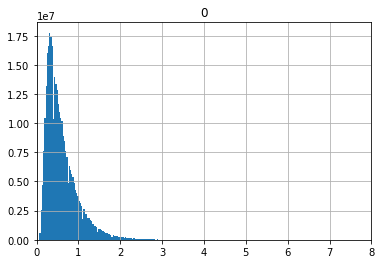

In [31]:
test.hist(bins=1000,label = 'pandas')
plt.xlim(0, 8)
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

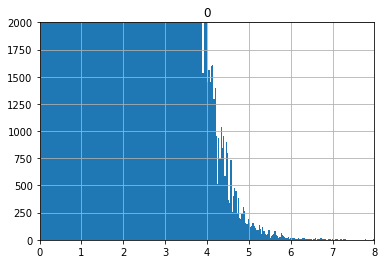

In [231]:
test.hist(bins=1000,label = 'pandas')
plt.xlim(0, 8)
plt.ylim(0,2000)
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

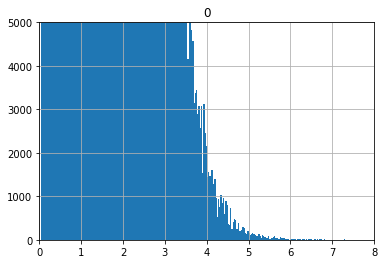

In [232]:
test.hist(bins=1000,label = 'pandas')
plt.xlim(0, 8)
plt.ylim(0,5000)
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

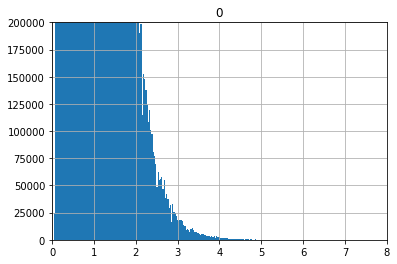

In [251]:
test.hist(bins=1000,label = 'pandas')
plt.xlim(0, 8)
plt.ylim(0,200000)
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

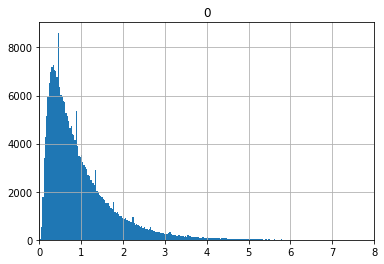

In [219]:
test.hist(bins=1000,label = 'pandas')
plt.xlim(0, 8)
plt.ylim(0,50)
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

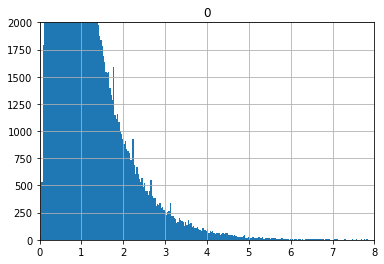

In [220]:
test.hist(bins=1000,label = 'pandas')
plt.xlim(0, 8)
plt.ylim(0,2000)
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

In [31]:
Utterdf1

,SessionID,0,1,2,3,4,5,6,7,8,...,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075
0,W011_001b-transUnit.TextGrid,0.085,0.605,0.190,0.938,0.600,2.768,0.814,2.051,0.949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.036,3.883,0.587,1.246,0.548,0.178,0.485,0.448,0.902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.700,0.590,0.453,2.067,0.736,2.273,0.830,1.782,0.670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.899,0.328,0.957,0.742,0.374,1.818,1.570,0.308,0.389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.866,0.779,1.316,0.615,0.679,0.908,1.377,0.316,2.663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,NaN,0.487,0.273,0.380,1.660,0.350,1.472,6.134,0.668,0.228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,NaN,0.213,1.090,0.588,2.641,0.847,0.720,1.560,1.419,2.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,NaN,1.256,1.517,2.610,2.735,0.372,0.242,0.648,1.202,4.475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,NaN,0.354,1.736,0.473,0.182,0.551,1.326,0.280,1.256,0.094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
utterTdf1["C001_002"].hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.ylabel('frequency')
plt.xlabel('Time')
plt.legend()
plt.title('C001_002_1')
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

#
utterTdf2["C001_002"].hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.ylabel('frequency')
plt.xlabel('Time')
plt.legend()
plt.title('C001_002_2')
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

KeyError: 'C001_002'

In [33]:
utterTdf1["C001_003"].hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.ylabel('frequency')
plt.xlabel('Time')
plt.legend()
plt.title('C001_003_1')
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

#
utterTdf2["C001_003"].hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.ylabel('frequency')
plt.xlabel('Time')
plt.legend()
plt.title('C001_003_2')
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

KeyError: 'C001_003'

In [34]:
utterTdf1["C001_004"].hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.ylabel('frequency')
plt.xlabel('Time')
plt.legend()
plt.title('C001_004_1')
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

#
utterTdf2["C001_004"].hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.ylabel('frequency')
plt.xlabel('Time')
plt.legend()
plt.title('C001_004_2')
#plt.savefig("pandas_hist.png")
plt.show()
plt.close()

KeyError: 'C001_004'

In [72]:

tg = read_textgrid("./data/K001/K001_004/K001_004-transUnit.TextGrid")
tier_name = tg.get_tier_names()
tier1 = tg.get_tier_by_name(tier_name[0])
tier2 = tg.get_tier_by_name(tier_name[1])
    #発話時間
utterTime1 = [interval.end_time - interval.start_time for interval in tier1 if interval.text != "pz"]
utterTime2 = [interval.end_time - interval.start_time for interval in tier2 if interval.text != "pz"]

utterTime1 = DataFrame(utterTime1)
utterTime2 = DataFrame(utterTime2)

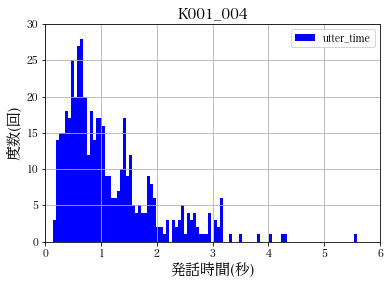

In [73]:
utterTime1.hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.xlim(0, 6)                # x軸の表示範囲
plt.ylim(0, 30)  
plt.ylabel('度数(回)',fontsize=15)
plt.xlabel('発話時間(秒)',fontsize=15)
plt.legend()
plt.title('K001_004',fontsize=15)
plt.savefig("/Users/katouryuusei/Library/CloudStorage/Dropbox/B4seminar/卒業研究提出書類/卒論本体/2023_01_10_卒業論文/figures/hatsuwaHist1.png")
plt.show()
plt.close()

In [74]:
tg = read_textgrid("./data/K001/K001_009/K001_009-transUnit.csv")
tier_name = tg.get_tier_names()
tier1 = tg.get_tier_by_name(tier_name[0])
tier2 = tg.get_tier_by_name(tier_name[1])
    #発話時間
utterTime1 = [interval.end_time - interval.start_time for interval in tier1 if interval.text != "pz"]
utterTime2 = [interval.end_time - interval.start_time for interval in tier2 if interval.text != "pz"]

utterTime1 = DataFrame(utterTime1)
utterTime2 = DataFrame(utterTime2)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 64: invalid start byte

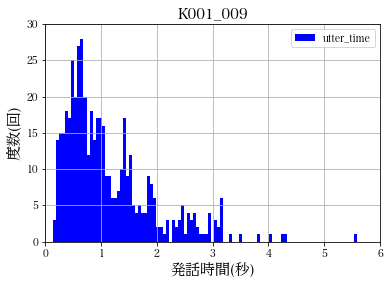

In [75]:
utterTime1.hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.xlim(0, 6)                # x軸の表示範囲
plt.ylim(0, 30)  
plt.ylabel('度数(回)',fontsize=15)
plt.xlabel('発話時間(秒)',fontsize=15)
plt.legend()
plt.title('K001_009',fontsize=15)
plt.savefig("/Users/katouryuusei/Library/CloudStorage/Dropbox/B4seminar/卒業研究提出書類/卒論本体/2023_01_10_卒業論文/figures/hatsuwaHist2.png")
plt.show()
plt.close()

In [76]:
tg = read_textgrid("./data/T008/T008_011/T008_011-transUnit.TextGrid")
tier_name = tg.get_tier_names()
tier1 = tg.get_tier_by_name(tier_name[0])
tier2 = tg.get_tier_by_name(tier_name[1])
    #発話時間
utterTime1 = [interval.end_time - interval.start_time for interval in tier1 if interval.text != "pz"]
utterTime2 = [interval.end_time - interval.start_time for interval in tier2 if interval.text != "pz"]

utterTime1 = DataFrame(utterTime1)
utterTime2 = DataFrame(utterTime2)

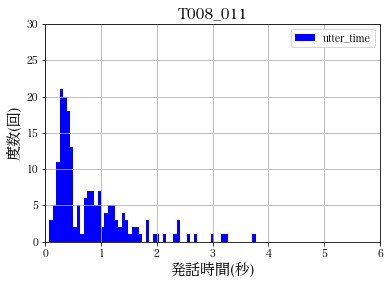

In [77]:
utterTime1.hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.xlim(0, 6)                # x軸の表示範囲
plt.ylim(0, 30)
plt.ylabel('度数(回)',fontsize=15)
plt.xlabel('発話時間(秒)',fontsize=15)
plt.legend()
plt.title('T008_011',fontsize=15)
plt.savefig("/Users/katouryuusei/Library/CloudStorage/Dropbox/B4seminar/卒業研究提出書類/卒論本体/2023_01_10_卒業論文/figures/hatsuwaHist3.png")
plt.show()
plt.close()

In [78]:
tg = read_textgrid("./data/T008/T008_013/T008_013-transUnit.TextGrid")
tier_name = tg.get_tier_names()
tier1 = tg.get_tier_by_name(tier_name[0])
tier2 = tg.get_tier_by_name(tier_name[1])
    #発話時間
utterTime1 = [interval.end_time - interval.start_time for interval in tier1 if interval.text != "pz"]
utterTime2 = [interval.end_time - interval.start_time for interval in tier2 if interval.text != "pz"]

utterTime1 = DataFrame(utterTime1)
utterTime2 = DataFrame(utterTime2)

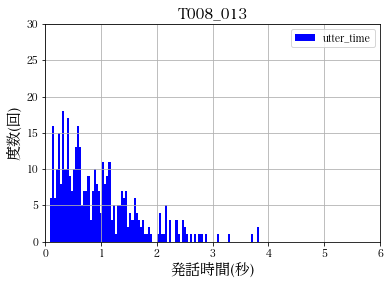

In [79]:
utterTime1.hist(bins=100, color = "blue", grid =True, label = 'utter_time')
plt.rcParams['font.family'] = "Hiragino Mincho ProN"
plt.xlim(0, 6)                # x軸の表示範囲
plt.ylim(0, 30)
plt.ylabel('度数(回)',fontsize=15)
plt.xlabel('発話時間(秒)',fontsize=15)
plt.legend()
plt.title('T008_013',fontsize=15)
plt.savefig("/Users/katouryuusei/Library/CloudStorage/Dropbox/B4seminar/卒業研究提出書類/卒論本体/2023_01_10_卒業論文/figures/hatsuwaHist4.png")
plt.show()
plt.close()